In [93]:
!pip install -i https://test.pypi.org/simple/ lambdata-karen

import numpy as np
import pickle
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd

from statools.metrics import ConfusionMatrix
from statools.log_regression import LogRegression

Looking in indexes: https://test.pypi.org/simple/


In [94]:
connection = sqlite3.Connection('web_app\\db\\twitoff_db.sqlite')
cursor = connection.cursor()

In [95]:
query = '''
        SELECT DISTINCT u.user, COUNT(t.id)
        FROM user AS u
        INNER JOIN tweet AS t
        ON t.user_id == u.id
        GROUP BY u.user
        '''
pd.DataFrame(cursor.execute(query).fetchall(), columns=['user', 'tweets'])

,user,tweets
0,ElonMusk,409
1,RealSophiaRobot,582
2,lexfridman,644
3,neiltyson,573
4,suzannegildert,460


In [96]:
def getData(users):
    query = f'''
             SELECT u.user, t.embedding
             FROM user AS u
             INNER JOIN tweet AS t
             ON t.user_id == u.id
             WHERE u.user IN {users}
             '''
    raw_data = cursor.execute(query).fetchall()
    
    X = []
    y = []
    for row in raw_data:
        data = pickle.loads(row[1])
        X.append(data)
        y.append(row[0])
        
    X = np.array(X)
    le = LabelEncoder()
    y = le.fit_transform(y)
        
    return X, y

In [97]:
X, y = getData(('ElonMusk', 'neiltyson'))

In [98]:
X.shape

(982, 768)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_test.shape, y_test.shape

((99, 768), (99,))

In [117]:
clf = LogisticRegression(max_iter=5000, solver='lbfgs')
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f'Training {train_accuracy * 100}%\nTest {test_accuracy * 100}%')

Training 99.77349943374858%
Test 90.9090909090909%


In [118]:
y_hat = clf.predict(X_test)
cm = ConfusionMatrix(y_test, y_hat)
cm.get_confusion_matrix()

,0,1
0,41,4
1,5,49


In [119]:
cm.get_metrics()

,precision,recall,f1-score
0,0.891304,0.911111,0.901099
1,0.924528,0.907407,0.915888


In [120]:
clf2 = LogRegression(0.05, 3000, verbose=100)


In [121]:
X_train_r = X_train.T
X_train_r.shape

(768, 883)

In [122]:
y_train_r = y_train.reshape(1, -1)
y_train_r.shape

(1, 883)

In [123]:
clf2.fit(X_train_r, y_train_r)

Epoch 100 Loss 0.23101534930189804 Accuracy 0.9184597961494904
Epoch 200 Loss 0.1877649835000001 Accuracy 0.9388448471121178
Epoch 300 Loss 0.1647484701252003 Accuracy 0.9456398640996603
Epoch 400 Loss 0.14950171703913534 Accuracy 0.9524348810872028
Epoch 500 Loss 0.1382593962699543 Accuracy 0.9546998867497168
Epoch 600 Loss 0.12941349012252398 Accuracy 0.956964892412231
Epoch 700 Loss 0.12214987712151651 Accuracy 0.9626274065685164
Epoch 800 Loss 0.11600712129864384 Accuracy 0.9660249150622876
Epoch 900 Loss 0.11070049658142224 Accuracy 0.9660249150622876
Epoch 1000 Loss 0.1060421091951346 Accuracy 0.9660249150622876
Epoch 1100 Loss 0.10190111874353203 Accuracy 0.9671574178935447
Epoch 1200 Loss 0.09818243354756734 Accuracy 0.9716874292185731
Epoch 1300 Loss 0.09481457523806396 Accuracy 0.9728199320498301
Epoch 1400 Loss 0.09174237422227462 Accuracy 0.9750849377123443
Epoch 1500 Loss 0.08892234641713787 Accuracy 0.9762174405436014
Epoch 1600 Loss 0.08631963273528212 Accuracy 0.9796149

In [124]:
y_test_r = y_test.reshape(1, -1)
X_test_r = X_test.T


In [125]:
y_hat2 = clf2.predict(X_test_r)
accuracy_score(y_test.flatten(), y_hat2[0])

0.9090909090909091

In [126]:
cm = ConfusionMatrix(y_test.flatten(), y_hat2[0])

In [127]:
cm.get_confusion_matrix()

,0,1
0,41,4
1,5,49


In [128]:
cm.get_metrics()

,precision,recall,f1-score
0,0.891304,0.911111,0.901099
1,0.924528,0.907407,0.915888


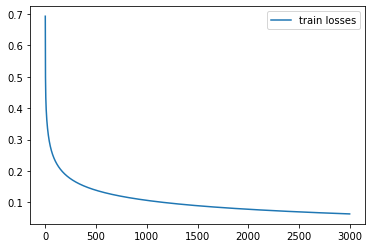

In [132]:
import matplotlib.pyplot as plt
plt.plot(clf2.train_losses, label='train losses')
# plt.plot(clf2.train_accuracy, label='train accuracy')
plt.legend();
